# Iris Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

I will determine the ideal number of clusters and plot the data with 2, 3 and 5 clusters. 

Finally, I will import the CSV with the correct answers (iris_with_answers.csv) and check if the clustering worked as expected. Note that this is not how I usually go about clustering problems. If I have the answers prior to that, I would go for classification (e.g. a logistic regression).

## Import the relevant libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [38]:
data = pd.read_csv('iris_dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, I will first try to cluster the iris flowers by the shape of their sepal. 

Text(0, 0.5, 'Sepal Width')

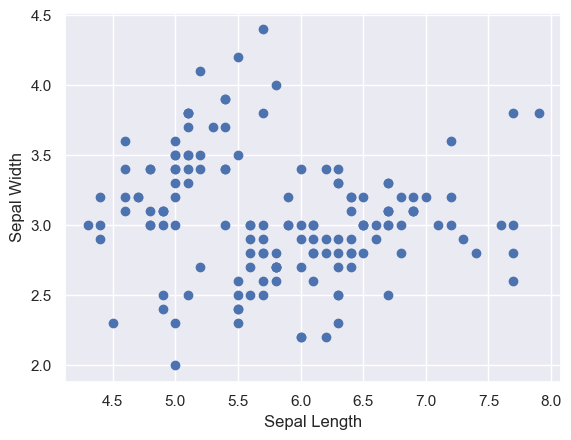

In [39]:
plt.scatter('sepal_length','sepal_width', data = data)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Clustering (unscaled data)

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(2)

In [42]:
x = data.copy()
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
data['Cluster'] = kmeans.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


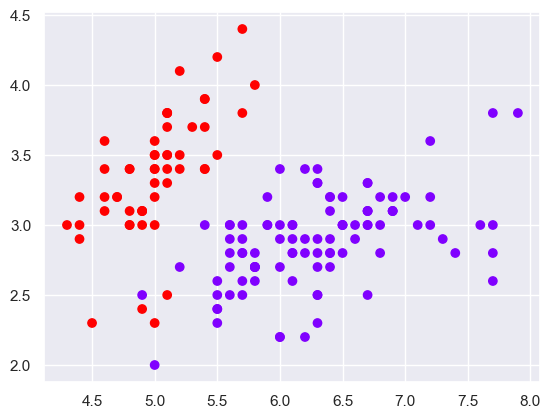

In [45]:
plt.scatter('sepal_length','sepal_width', data = data, c = 'Cluster', cmap = 'rainbow')

## Standardize the variables

I will import and use the <i> scale </i> method from sklearn to standardize the data. 

In [46]:
from sklearn import preprocessing

In [47]:
x_scaled = preprocessing.scale(x)

In [48]:
data_scaled = data.drop('Cluster', axis = 1)
data_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Clustering (scaled data)

In [49]:
kmeans = KMeans(2)

In [50]:
data_scaled['Cluster'] = kmeans.fit_predict(x_scaled)
data_scaled.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


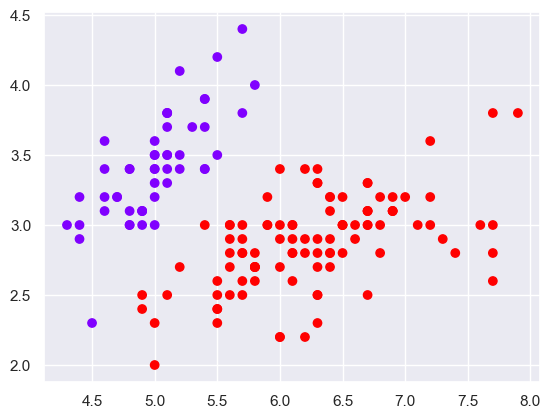

In [51]:
plt.scatter('sepal_length','sepal_width', data = data_scaled, c = 'Cluster', cmap = 'rainbow')

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

## Take Advantage of the Elbow Method

I will now try to estimate the ideal number of Clusters by employing the Elbow Method

### WCSS

In [52]:
wcss = []
n = 10

In [53]:
for i in range(1,n):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [54]:
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.68221609937967,
 91.00244098567246,
 81.72449131841107,
 71.94273046782052,
 62.79352671870209,
 54.61598384854029]

### The Elbow Method

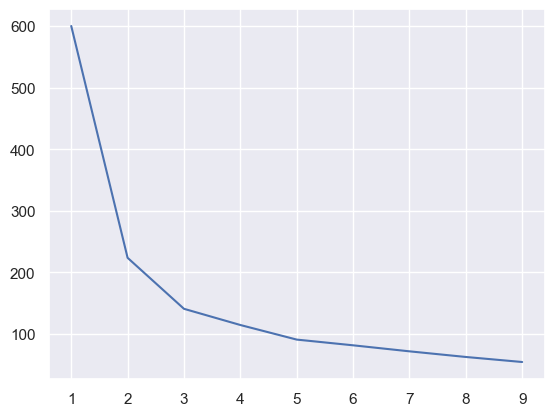

In [55]:
plt.plot(range(1,n), wcss)

## Understanding the Elbow Curve

I will construct and compare the scatter plots to determine which number of clusters is appropriate for further use in my analysis. Based on the Elbow Curve, 2, 3, 4, or 5 seem the most likely.

## 2 clusters

Construct a scatter plot of the original data using the standardized clusters

In [56]:
kmeans = KMeans(2)

In [57]:
data_scaled['Cluster'] = kmeans.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


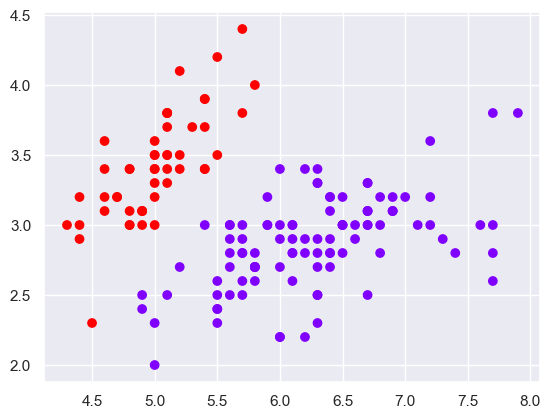

In [58]:
plt.scatter('sepal_length','sepal_width', data = data_scaled, c = 'Cluster', cmap = 'rainbow')

## 3 clusters

In [59]:
kmeans = KMeans(3)

In [60]:
data_scaled['Cluster'] = kmeans.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


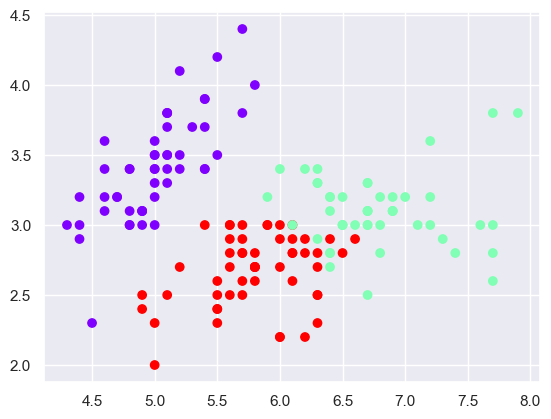

In [61]:
plt.scatter('sepal_length','sepal_width', data = data_scaled, c = 'Cluster', cmap = 'rainbow')

## 5 clusters

In [62]:
kmeans = KMeans(5)

In [63]:
data_scaled['Cluster'] = kmeans.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


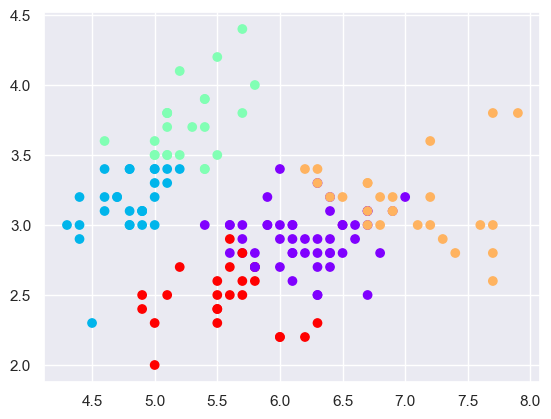

In [64]:
plt.scatter('sepal_length','sepal_width', data = data_scaled, c = 'Cluster', cmap = 'rainbow')

## Comparing my solutions to the original Iris Dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. I will load the csv, plot the data and compare it with my solution. 

There are only 3 types, because that's the original Iris Dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [65]:
answers = pd.read_csv('iris_with_answers.csv')
answers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
answers['species'] = answers['species'].map({'setosa':0,'versicolor':1,'virginica':2})
answers['species'].unique()

array([0, 1, 2], dtype=int64)

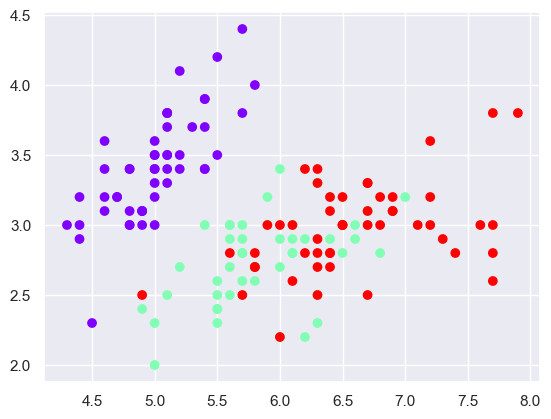

In [67]:
plt.scatter('sepal_length','sepal_width', data = answers, c = 'species', cmap = 'rainbow')

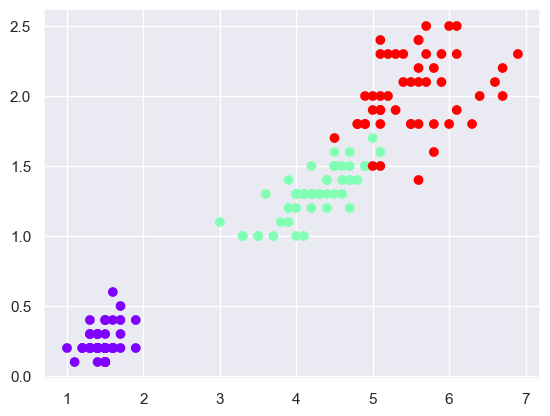

In [68]:
plt.scatter('petal_length','petal_width', data = answers, c = 'species', cmap = 'rainbow')

Comparing Sepal and Petal features, it is clear that Petal features are better features 

In [69]:
kmeans = KMeans(3)

In [70]:
data_scaled['Cluster'] = kmeans.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


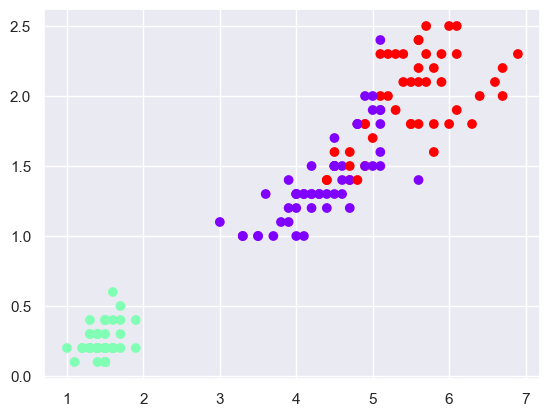

In [71]:
plt.scatter('petal_length','petal_width', data = data_scaled, c = 'Cluster', cmap = 'rainbow')

Clustering Iris Flower Species into 3 clusters using Petal Length and Width features would have led to the most accurate results. This illustrates the importance of selecting features for clustering carefully.  